In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('WineQT.csv')

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
dataset["quality"].unique()

array([5, 6, 7, 4, 8, 3])

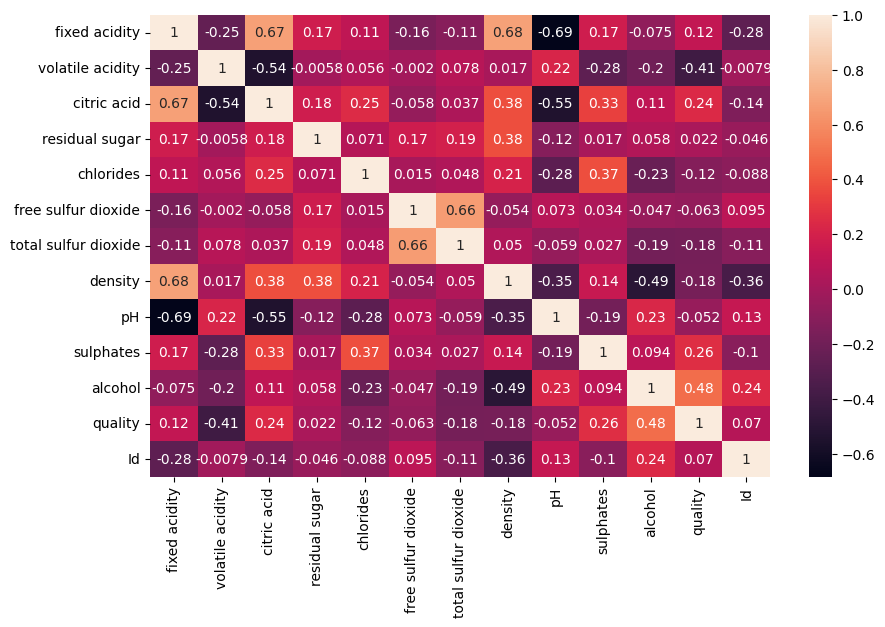

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [13]:
dataset.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667,1121.166667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606,692.848485
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277,753.925466
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339,854.625541
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634,830.349650
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500,797.875000


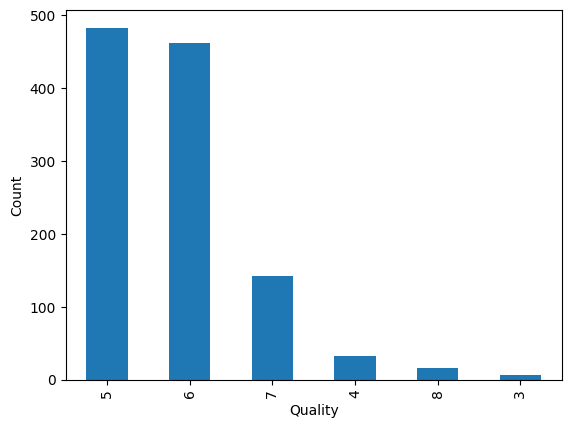

In [15]:
dataset["quality"].value_counts().plot(kind="bar")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

C:\Users\sk021\AppData\Local\Temp\ipykernel_10296\3877062363.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


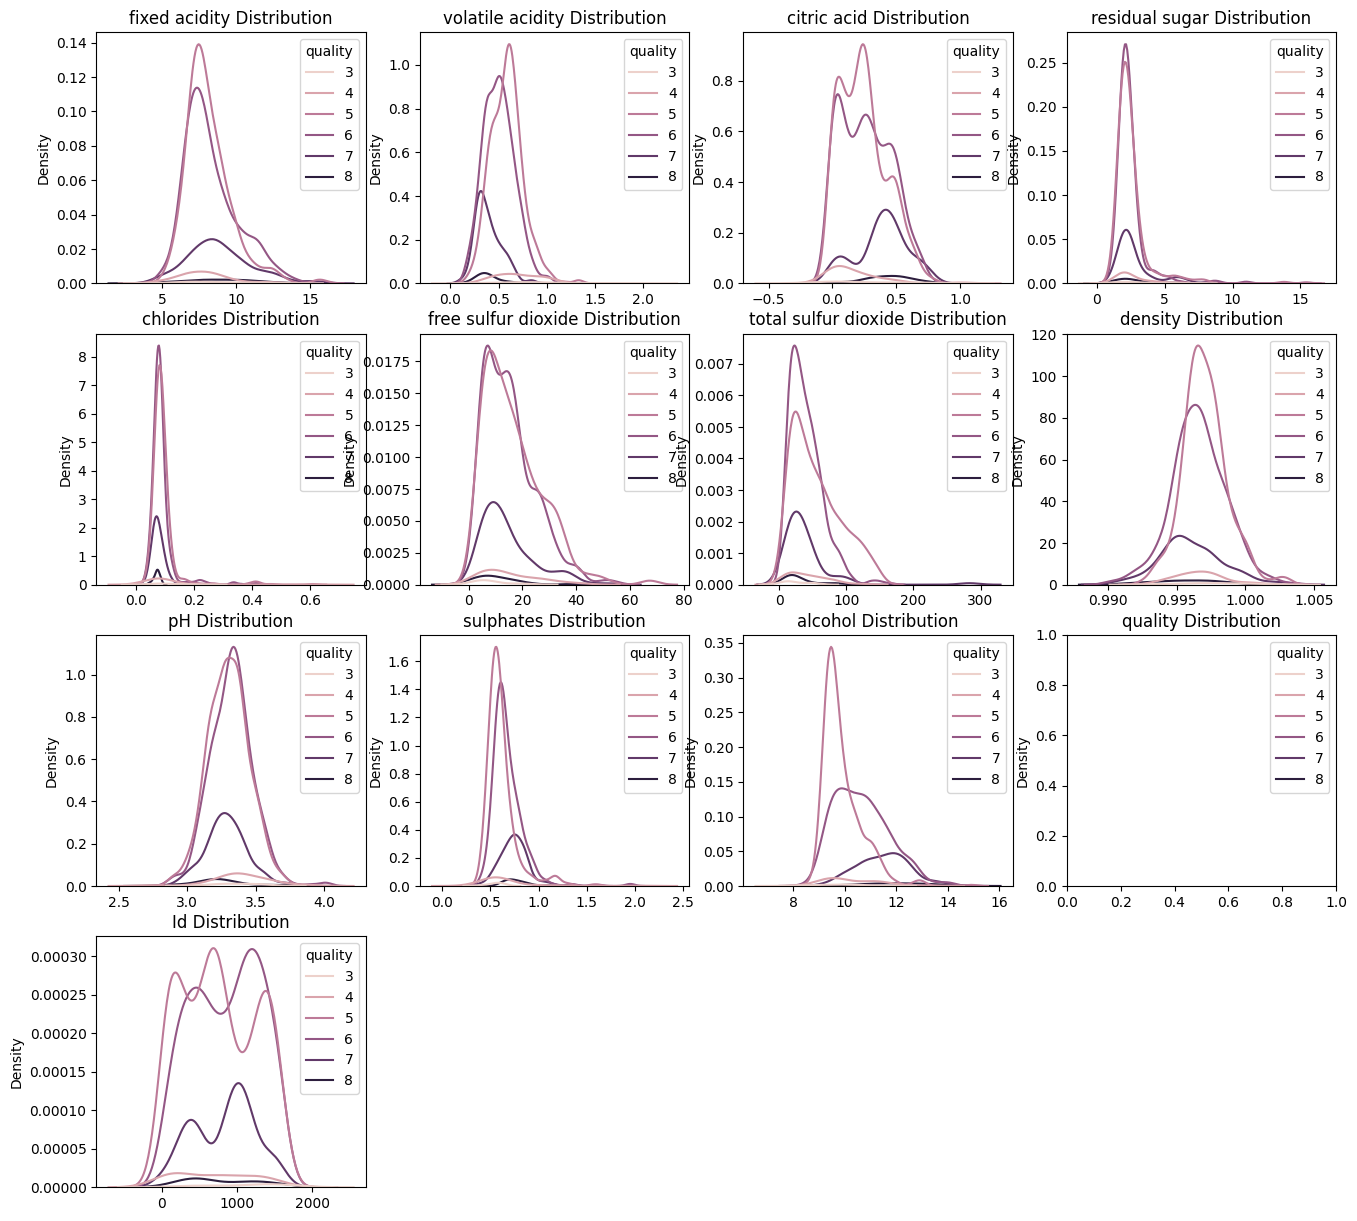

In [21]:
columns = dataset.columns
(figure, axes) = plt.subplots(4,4, figsize=(16,15))
axes = axes.flatten()
# print(axes.flatten())
for i,column in enumerate(columns):
    sns.kdeplot(
        data=dataset,
        x = column,
        hue = dataset["quality"],
        ax= axes[i]
        
    )
    axes[i].set_title(f"{column} Distribution")
    axes[i].set_xlabel(None)

for i in range(i+1, len(axes)):
    axes[i].axis("off")

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
from sklearn.metrics import accuracy_score, classification_report

In [26]:
X=dataset.drop('quality',axis=1)
y=dataset['quality']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.tree import plot_tree

In [97]:
depth=[3,5,10,None]
accuracy=[]
for i in depth:
    model=DecisionTreeClassifier(max_depth=i,random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    accuracy.append(acc)
    print(f"For depth : {i} \n")
    print(f"Accuracy : {acc} \n")
    print("\nReport:\n", classification_report(y_test, y_pred),'\n')

For depth : 3 

Accuracy : 0.5807860262008734 


Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.80      0.54      0.65        96
           6       0.53      0.77      0.63        99
           7       0.25      0.19      0.22        26
           8       0.00      0.00      0.00         2

    accuracy                           0.58       229
   macro avg       0.32      0.30      0.30       229
weighted avg       0.59      0.58      0.57       229
 

For depth : 5 

Accuracy : 0.6069868995633187 


Report:
               precision    recall  f1-score   support

           4       0.50      0.17      0.25         6
           5       0.70      0.71      0.70        96
           6       0.58      0.65      0.61        99
           7       0.32      0.23      0.27        26
           8       0.00      0.00      0.00         2

    accuracy                           0.61       229
   macro avg 

C:\Users\sk021\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sk021\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sk021\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

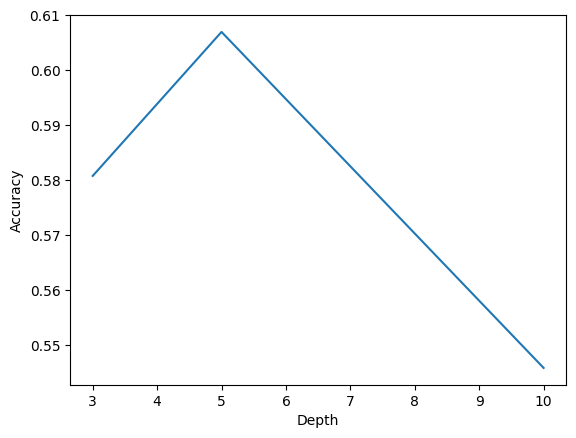

In [86]:
plt.plot(depth,accuracy)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.savefig('Depth-vs-Accuracy.png')
plt.show()

In [90]:
model=DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

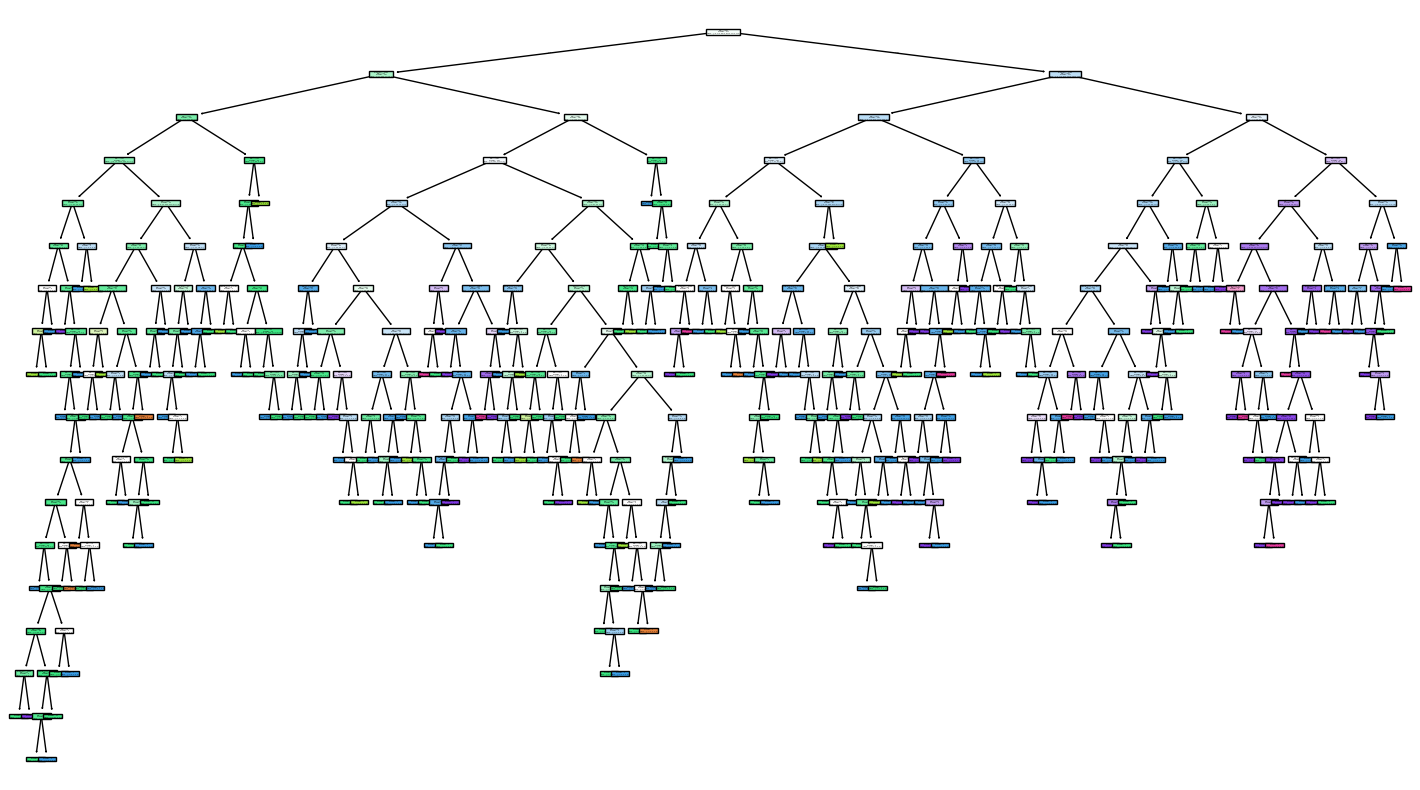

In [98]:
plt.figure(figsize=(18, 10))
plot_tree(model, filled=True, feature_names=dataset.columns)
plt.savefig('Decision_tree(depth=5).png')
plt.show()

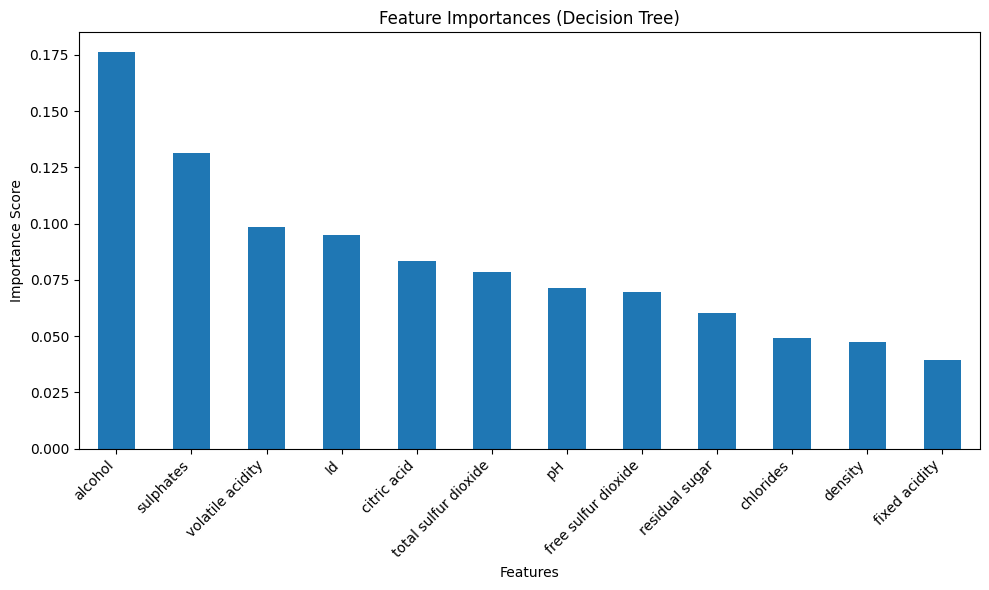

In [99]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind="bar")
plt.title("Feature Importances (Decision Tree)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [100]:
import pickle

In [103]:
with open('DecisionTree_classifier.pkl','wb') as file:
    pickle.dump(model,file)